Casos de isoclinas

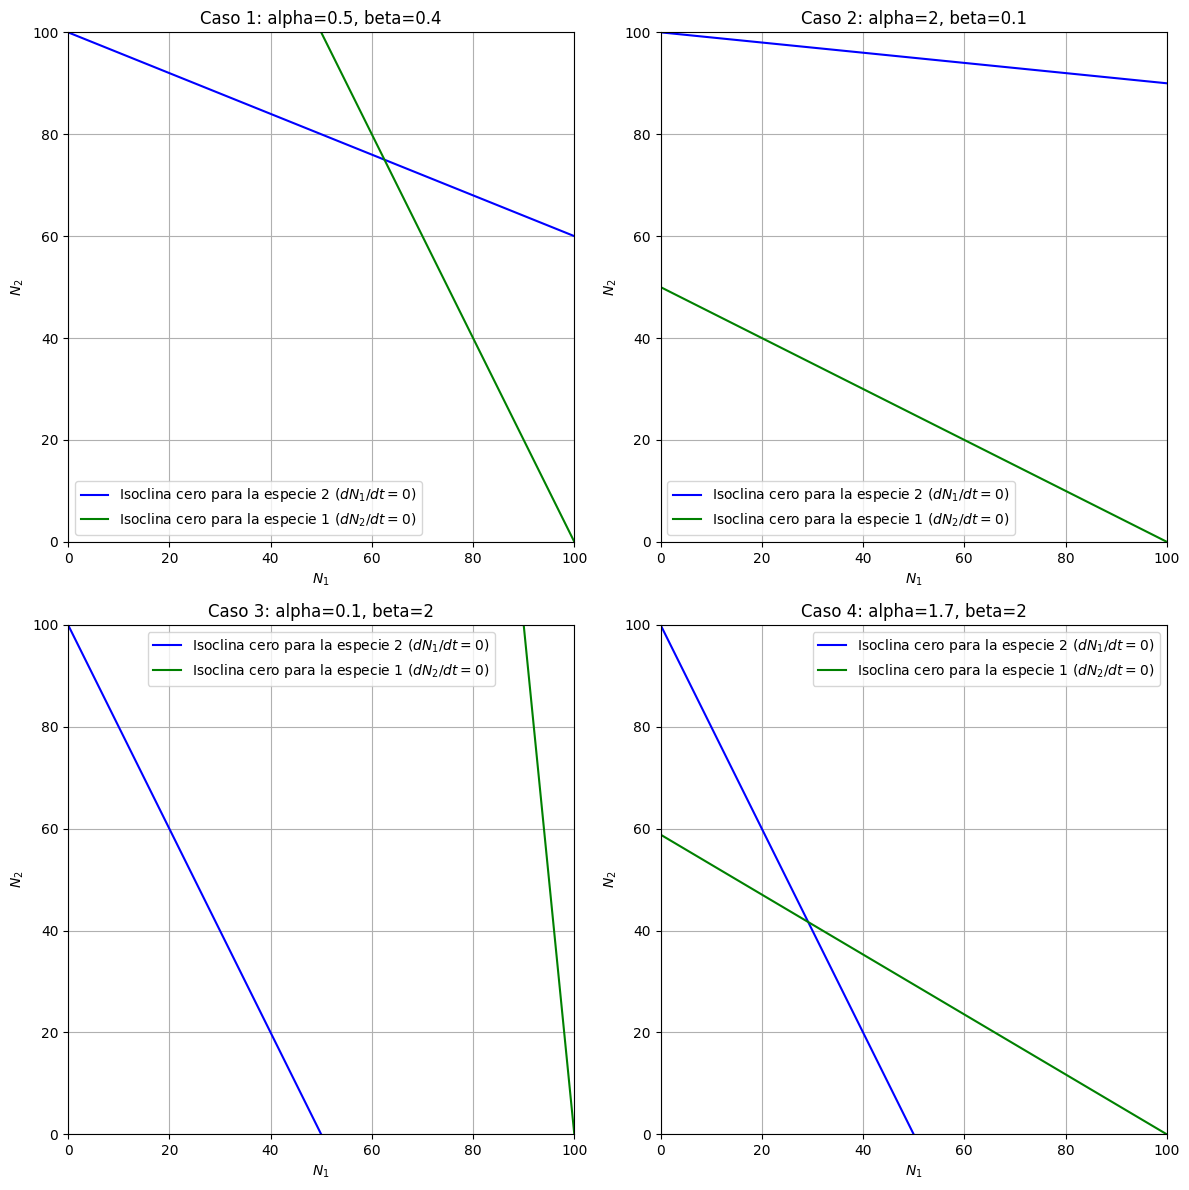

In [74]:
import matplotlib.pyplot as plt
import numpy as np

cases = {
    "Caso 1": {"alpha": 0.5, "beta": 0.4},
    "Caso 2": {"alpha": 2, "beta": 0.1},
    "Caso 3": {"alpha": 0.1, "beta": 2},
    "Caso 4": {"alpha": 1.7, "beta": 2}
}
K1, K2 = 100, 100  
r1 = r2 = 1

# Define N1 and N2 ranges
N1 = np.linspace(0, K1, 400)
N2 = np.linspace(0, K2, 400)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (Caso, params) in enumerate(cases.items()):
    alpha = params["alpha"]
    beta = params["beta"]
    N1_zero_isocline = K1 - alpha * N2  # Isoclina cero para la especie 1
    N2_zero_isocline = K2 - beta * N1  # Isoclina cero para la especie 2
    
    ax = axes[i]
    ax.plot(N1, N2_zero_isocline, label='Isoclina cero para la especie 2 ($dN_1/dt = 0$)', color='blue')
    ax.plot(N1_zero_isocline, N2, label='Isoclina cero para la especie 1 ($dN_2/dt = 0$)', color='green')
    ax.set_xlim(0, K1)
    ax.set_ylim(0, K2)
    ax.set_xlabel('$N_1$')
    ax.set_ylabel('$N_2$')
    ax.set_title(f'{Caso}: alpha={alpha}, beta={beta}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


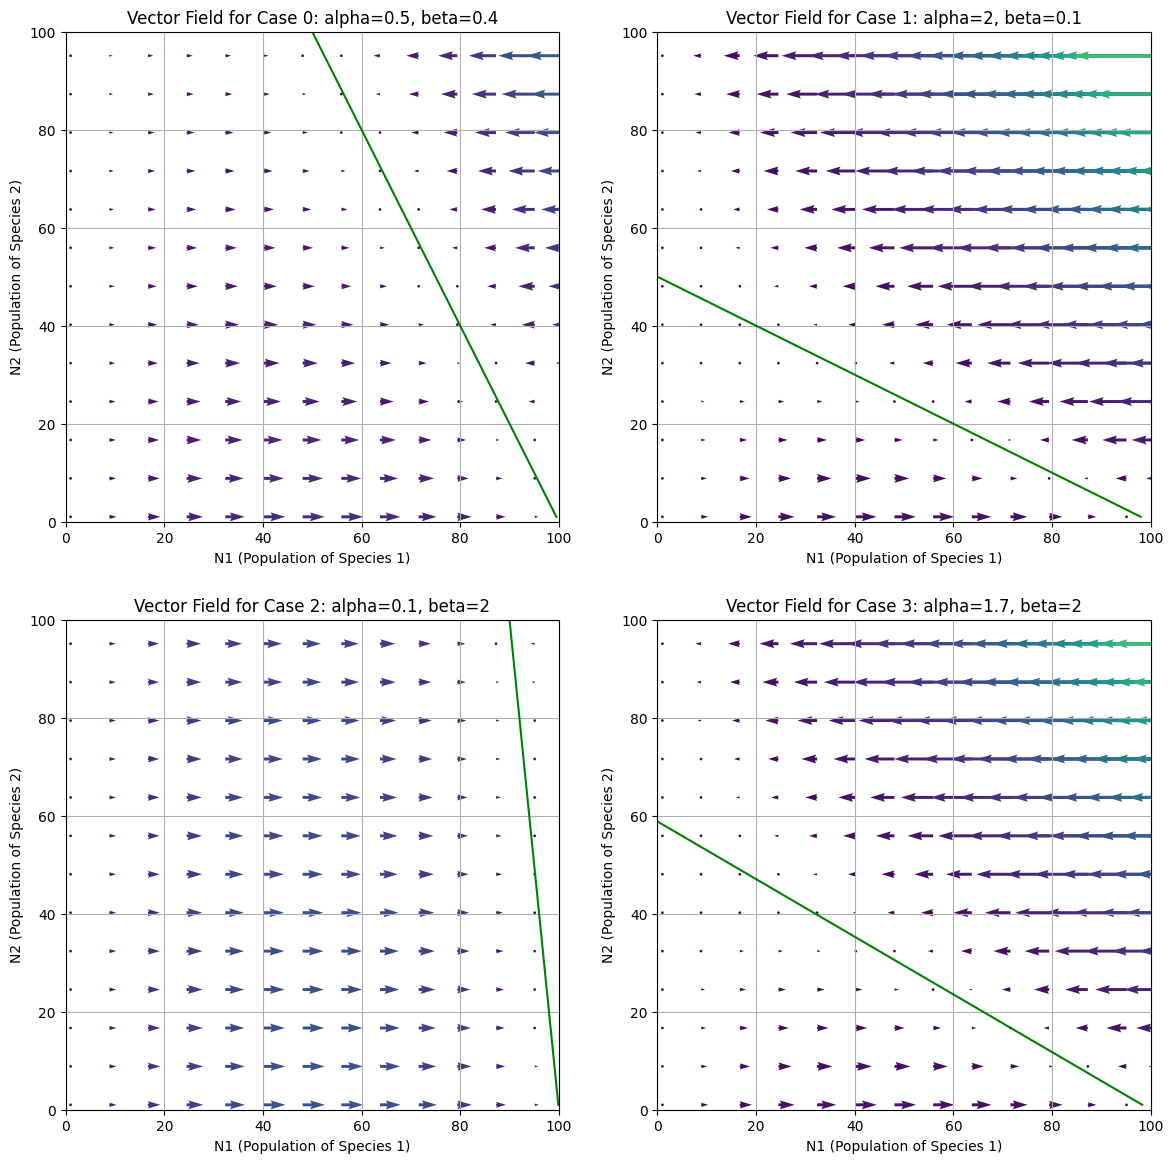

In [75]:
def plot_single_vector_field():
    # Grid for N1 and N2
    N1 = np.linspace(1, 150, 20)
    N2 = np.linspace(1, 150, 20)

    plt.figure(figsize=(14, 14))
    # Create plots for each case
    for i, params in enumerate(cases.values()):
        plt.subplot(2, 2, i + 1)
        N1_grid, N2_grid = np.meshgrid(N1, N2)
        dN1_dt = r1 * N1_grid * (K1 - N1_grid - params['alpha'] * N2_grid) / K1
        dN2_dt = 0

        # Compute magnitude for color coding
        magnitude = np.sqrt(dN1_dt**2 + dN2_dt**2)
        
        
        plt.quiver(N1_grid, N2_grid, dN1_dt, dN2_dt, magnitude, scale=550, cmap='viridis', width=0.006)
        N1_zero_isocline = K1 - params["alpha"] * N2  # Isoclina cero para la especie 1


        N2_zero_isocline = K2 - params["beta"] * N1  # Isoclina cero para la especie 2

        # plt.plot(N1, N2_zero_isocline, label='Isoclina cero para la especie 2 ($dN_1/dt = 0$)', color='blue')
        plt.plot(N1_zero_isocline, N2, label='Isoclina cero para la especie 1 ($dN_2/dt = 0$)', color='green')
        plt.xlabel('N1 (Population of Species 1)')
        plt.ylabel('N2 (Population of Species 2)')
        plt.title(f'Vector Field for Case {i}: alpha={params["alpha"]}, beta={params["beta"]}')
        plt.grid(True)
        plt.xlim([0, K1])
        plt.ylim([0, K2])
    plt.show()

plot_single_vector_field()

{'alpha': 0.5, 'beta': 0.4}
{'alpha': 2, 'beta': 0.1}
{'alpha': 0.1, 'beta': 2}
{'alpha': 1.7, 'beta': 2}


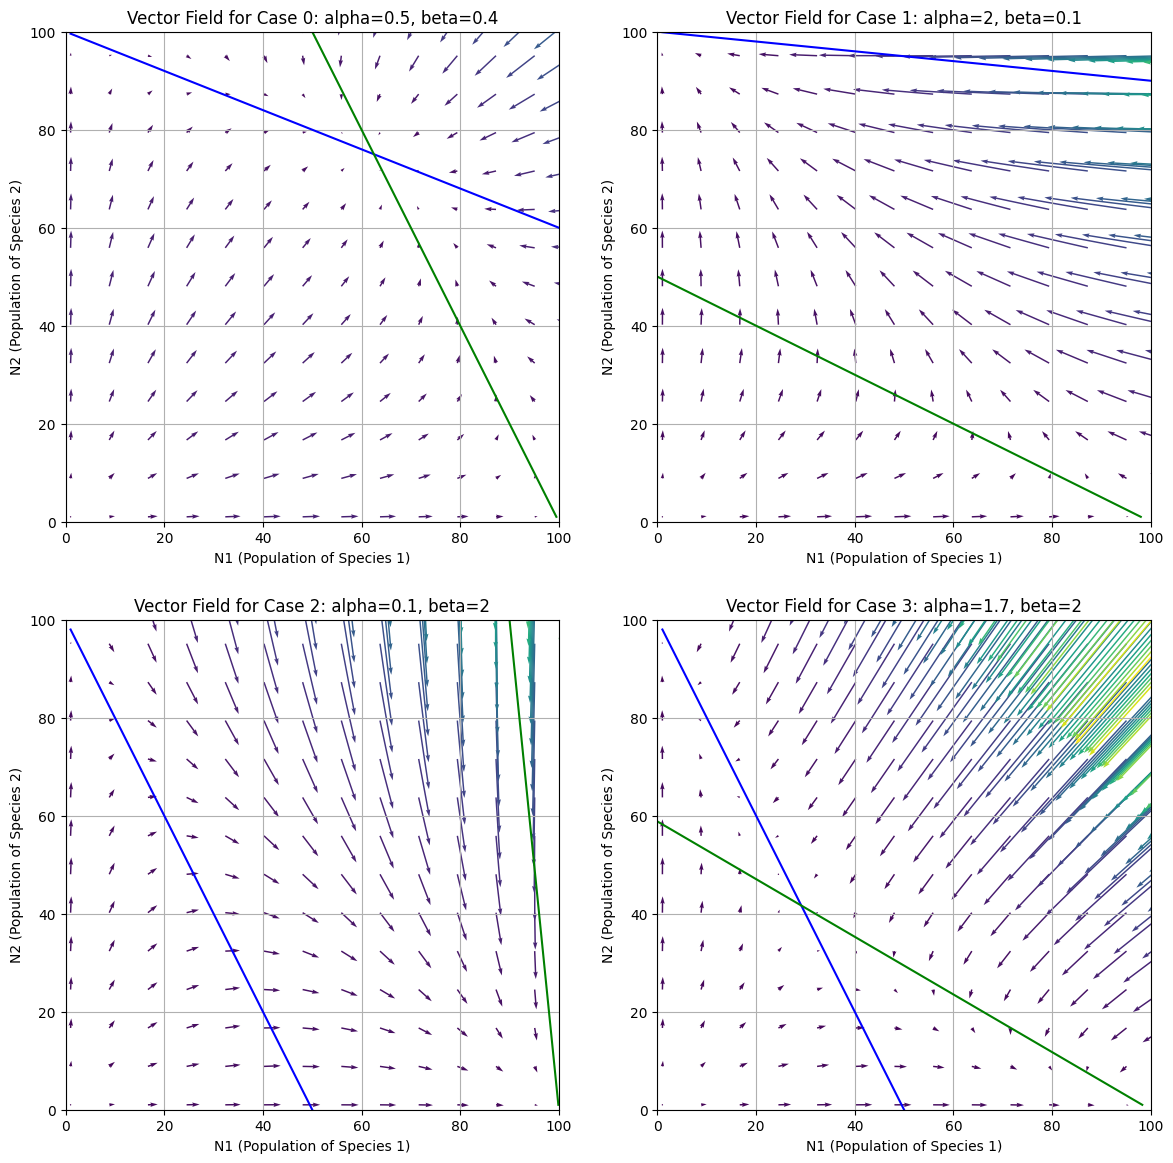

In [76]:
def plot_vector_field():
    # Grid for N1 and N2
    N1 = np.linspace(1, 150, 20)
    N2 = np.linspace(1, 150, 20)

    plt.figure(figsize=(14, 14))
    # Create plots for each case
    for i, params in enumerate(cases.values()):
        plt.subplot(2, 2, i + 1)
        N1_grid, N2_grid = np.meshgrid(N1, N2)
        print(params)  
        dN1_dt = r1 * N1_grid * (K1 - N1_grid - params['alpha'] * N2_grid) / K1
        dN2_dt = r2 * N2_grid * (K2 - N2_grid - params['beta'] * N1_grid) / K2

        # Compute magnitude for color coding
        magnitude = np.sqrt(dN1_dt**2 + dN2_dt**2)
        
        plt.quiver(N1_grid, N2_grid, dN1_dt, dN2_dt, magnitude, scale=700, cmap='viridis', width=0.003)
        N1_zero_isocline = K1 - params["alpha"] * N2  # Isoclina cero para la especie 1
        N2_zero_isocline = K2 - params["beta"] * N1  # Isoclina cero para la especie 2

        plt.plot(N1, N2_zero_isocline, label='Isoclina cero para la especie 2 ($dN_1/dt = 0$)', color='blue')
        plt.plot(N1_zero_isocline, N2, label='Isoclina cero para la especie 1 ($dN_2/dt = 0$)', color='green')
        plt.xlabel('N1 (Population of Species 1)')
        plt.ylabel('N2 (Population of Species 2)')
        plt.title(f'Vector Field for Case {i}: alpha={params["alpha"]}, beta={params["beta"]}')
        plt.grid(True)
        plt.xlim([0, K1])
        plt.ylim([0, K2])
    plt.show()

plot_vector_field()


In [77]:

def rk4_system(dydt, y0, t, args=()):
    """Runge-Kutta 4th order (RK4) method for solving systems of ODEs."""
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = h * dydt(y[i], t[i], *args)
        k2 = h * dydt(y[i] + 0.5 * k1, t[i] + 0.5 * h, *args)
        k3 = h * dydt(y[i] + 0.5 * k2, t[i] + 0.5 * h, *args)
        k4 = h * dydt(y[i] + k3, t[i+1], *args)
        y[i+1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

def competition_model(y, t, r1, K1, alpha12, r2, K2, alpha21):
    """ODE system for the Lotka-Volterra competition model."""
    N1, N2 = y
    dN1_dt = r1 * N1 * (K1 - N1 - alpha12 * N2) / K1
    dN2_dt = r2 * N2 * (K2 - N2 - alpha21 * N1) / K2
    return np.array([dN1_dt, dN2_dt])


def time_series():

    # Initial conditions and time points
    y0 = [30, 40]
    t = np.linspace(0, 50, 1000)  # Longer time span for better visualization


    # Run simulations and plot results
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    for i, (case, params) in enumerate(cases.items()):
        solution = rk4_system(competition_model, y0, t, args=(1.0, 100, params["alpha"], 1.0, 100, params["beta"]))
        ax = axes[i]
        ax.plot(t, solution[:, 0], label='N1 (Species 1)')
        ax.plot(t, solution[:, 1], label='N2 (Species 2)')
        print(solution[1])
        ax.set_title(f'{case}: alpha={params["alpha"]}, beta={params["beta"]}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Population')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()
